In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

class Resolution(object):
    def __init__(self, size, MP):
        self.size = size
        self.MP = float(MP)
    
def resolution_list(di):
    text = 'MP       Resolution\n'
    for i in range(1,len(di)+1):
        if di[str(i)]:
            text += '{}  {}\n'.format(di[str(i)].MP, di[str(i)].size)
            i = i+1
    return text[:-1]

resolutions = {}

with open('screen_resolutions.txt','r') as f:
    for line in f:
        if not line.startswith('#'):
            cols = line.rstrip().split(',')
            resolutions.update({cols[0]: Resolution(cols[1], cols[2])})

In [2]:
ethernet_delays = []
ethernet_resolutions = []
hotspot_delays = []
hotspot_resolutions = []

with open('latency_tests.txt','r') as f:
    for i, line in enumerate(f):
        if not line.startswith('#'):
            if i is not 0:
                cols = line.rstrip().split(',')
                interface = int(cols[0])
                res = cols[1]
                fps = int(cols[2])
                tests = cols[3:]
                delays = []
                for test in tests:
                    start, end = test.split('-')
                    delays.append(float(start)-float(end))
                if interface == 1:
                    ethernet_delays.append(np.average(delays))
                    ethernet_resolutions.append(resolutions[res].MP)
                elif interface == 2:
                    hotspot_delays.append(np.average(delays))
                    hotspot_resolutions.append(resolutions[res].MP)

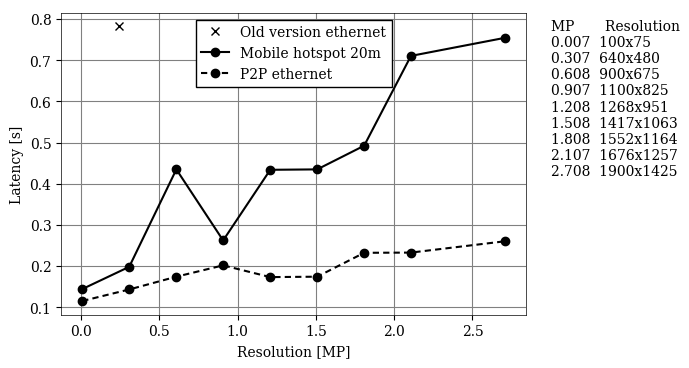

In [17]:
filename='latency'
plt.style.use('thesis.mplstyle')

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot(0.24,0.782, 'xk', label='Old version ethernet')
ax1.plot(hotspot_resolutions,hotspot_delays, '-ok', label='Mobile hotspot 20m')
ax1.plot(ethernet_resolutions,ethernet_delays, '--ok', label='P2P ethernet')
ax1.yaxis.grid()
ax1.xaxis.grid()

# plt.title('Video latencies eduROV version 0.0.5 @ 30fps')
plt.xlabel('Resolution [MP]')
plt.ylabel('Latency [s]')
plt.legend()

ax1.text(3, 0.42, resolution_list(resolutions))
fig.savefig('../img/{}.png'.format(filename), bbox_inches='tight')